In [0]:
import math, time 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
import datetime as dt

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

!unzip -uq "/content/drive/My Drive/digit_dataset.zip" -d ""

In [4]:

start = time.time() 
df = pd.read_csv('/content/digit_dataset/train.csv')
#print MNIST_train_small_df.head(3)
print (df.shape)

(42000, 785)


In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


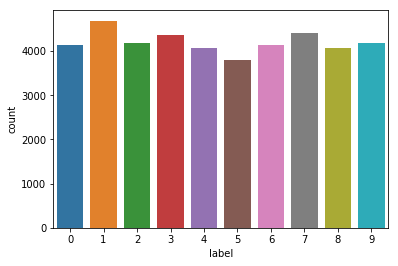

In [6]:
sns.countplot(df['label'])
plt.show()

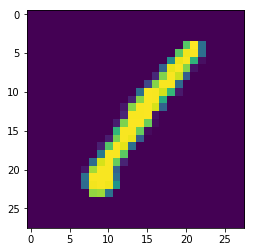

In [37]:
import matplotlib.pyplot as plt
import cv2
images = df.drop('label',axis = 1).values.reshape(-1,28,28,1) 
# images = X_train.values.reshape(-1,28,28,1) 

image = images[0]

plt.imshow(np.squeeze(image))


In [0]:
y = df['label']
X = df.drop('label',axis = 1)

In [0]:
X = X/255.0

In [9]:
print(X.iloc[1][300])
print(X.iloc[1][300]*255)

0.996078431372549
254.0


In [10]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)

In [0]:
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)
# classifier.fit(X_train, y_train)

In [13]:
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2019-06-30 01:33:47.927796
Stop learning 2019-06-30 01:46:05.281788
Elapsed learning 0:12:17.353992


In [0]:
predicted = classifier.predict(X_test)

In [15]:
cm = metrics.confusion_matrix(y_test, predicted)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[816   0   2   0   2   1   2   0   2   1]
 [  0 926   2   2   0   0   0   4   3   0]
 [  0   1 822   1   2   0   1   3   6   0]
 [  0   0   5 844   0  11   0   3   5   2]
 [  1   0   1   0 802   1   0   2   1   6]
 [  1   1   0   4   0 748   3   0   1   1]
 [  5   0   1   0   1   4 814   0   2   0]
 [  0   1   7   0   7   0   0 859   0   6]
 [  1   4   2   5   3   2   0   0 793   3]
 [  1   0   1   3  10   4   0   6   6 807]]


In [16]:
print(metrics.accuracy_score(y_test, predicted))

0.9798809523809524
